In [1]:
!pip install plotly
!pip install seaborn
!pip install geopandas

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point, Polygon

## **Q1: What is the frequency of startups founded per year?**

In [3]:
company = pd.read_csv('Startup Investment Dataset/updated_Mf_company_2.csv')
company.head()

,id,entity_id,name,category_code,status,founded_at,overview,country_code,city,region,funding_rounds,funding_total_usd
0,c:1,1,Wetpaint,web,operating,2005-10-17,Wetpaint is a technology platform company that...,USA,Seattle,Seattle,3,39750000
1,c:10,10,Flektor,games_video,acquired,NaN,Flektor is a rich-media mash-up platform that ...,USA,Culver City,Los Angeles,0,0
2,c:100,100,There,games_video,acquired,NaN,There.com is an online virtual world where any...,USA,San Mateo,SF Bay,0,0
3,c:10000,10000,MYWEBBO,network_hosting,operating,2008-07-26,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...",NaN,NaN,unknown,0,0
4,c:10001,10001,THE Movie Streamer,games_video,operating,2008-07-26,This company shows free movies online on their...,NaN,NaN,unknown,0,0


In [4]:
# Convert String object to Datetime

company["Year"] = pd.DatetimeIndex(company['founded_at']).year

In [5]:
# Check total number of missing values

company['founded_at'].isna().sum()

105326

In [6]:
company.columns

Index(['id', 'entity_id', 'name', 'category_code', 'status', 'founded_at',
       'overview', 'country_code', 'city', 'region', 'funding_rounds',
       'funding_total_usd', 'Year'],
      dtype='object')

In [7]:
bars =(company['Year'].value_counts().index.tolist())

2000.0     2264
2001.0     2024
2002.0     2001
2003.0     2268
2004.0     2610
2005.0     3235
2006.0     4246
2007.0     5923
2008.0     7350
2009.0     8948
2010.0    10183
2011.0    11216
2012.0    10584
2013.0     5828
2014.0       16
Name: Year, dtype: int64


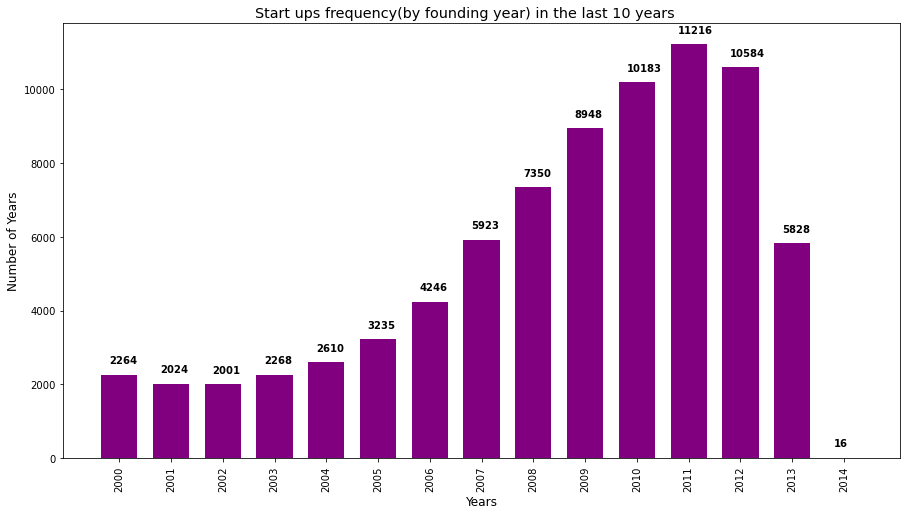

In [8]:
plt.rcParams['figure.figsize'] = 15,8
height = company[company['Year']>= 2000]['Year'].value_counts().sort_index().tolist()
print(company[company['Year']>= 2000]['Year'].value_counts().sort_index())
bars =  company[company['Year']>= 2000]['Year'].value_counts().sort_index().index.astype(int).tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= "Purple")
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.xlabel("Years",fontdict=None,size = 'large')
plt.ylabel("Number of Years",fontdict=None,size = 'large')
plt.title("Start ups frequency(by founding year) in the last 10 years", fontdict=None, position= [0.48,1.05], size = 'x-large')
for index, value in enumerate(height):
  plt.text(index-0.2, value+300, str(value), weight="bold" )
plt.show()

## **Q2: What is the Average Funding Amount (in $) by Funding Round Type?**

In [9]:
frold = pd.read_csv("Startup Investment Dataset/funding_rounds.csv")
print(frold.shape)
frold.head()

(52928, 23)


,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,12/1/2006,series-b,b,8500000,8500000,USD,0,...,0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,7/4/2007 4:52,2/27/2008 23:14
1,2,2,c:5,9/1/2004,angel,angel,500000,500000,USD,0,...,0,USD,2,0,1,NaN,NaN,initial-importer,5/27/2007 6:08,6/28/2013 20:07
2,3,3,c:5,5/1/2005,series-a,a,12700000,12700000,USD,115000000,...,0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,5/27/2007 6:09,6/28/2013 20:07
3,4,4,c:5,4/1/2006,series-b,b,27500000,27500000,USD,525000000,...,0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,5/27/2007 6:09,6/28/2013 20:07
4,5,5,c:7299,5/1/2006,series-b,b,10500000,10500000,USD,0,...,0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,5/29/2007 11:05,4/16/2008 17:09


In [10]:
# Converting String Column into DateTime Column

frold["funded_at"] = pd.to_datetime(frold["funded_at"])
frold["funded_year"] = frold.funded_at.dt.year
frold.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at,funded_year
0,1,1,c:4,2006-12-01,series-b,b,8500000,8500000,USD,0,...,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,7/4/2007 4:52,2/27/2008 23:14,2006.0
1,2,2,c:5,2004-09-01,angel,angel,500000,500000,USD,0,...,USD,2,0,1,NaN,NaN,initial-importer,5/27/2007 6:08,6/28/2013 20:07,2004.0
2,3,3,c:5,2005-05-01,series-a,a,12700000,12700000,USD,115000000,...,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,5/27/2007 6:09,6/28/2013 20:07,2005.0
3,4,4,c:5,2006-04-01,series-b,b,27500000,27500000,USD,525000000,...,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,5/27/2007 6:09,6/28/2013 20:07,2006.0
4,5,5,c:7299,2006-05-01,series-b,b,10500000,10500000,USD,0,...,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,5/29/2007 11:05,4/16/2008 17:09,2006.0


In [11]:
# Selecting relevant dates (21st Century only)

frold = frold[frold.funded_year >= 2000]
print(frold.shape)

(52527, 24)


In [12]:
# Removing unnecessary columns

frold.drop(columns=['updated_at', 'created_at', 'created_by', 'source_description', 'source_url',
                    'is_last_round', 'is_first_round', 'participants', 'post_money_currency_code',
                    'post_money_valuation', 'post_money_valuation_usd', 'pre_money_currency_code',
                    'pre_money_valuation', 'pre_money_valuation_usd', 'raised_currency_code',
                    'raised_amount'], inplace=True)
frold.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
0,1,1,c:4,2006-12-01,series-b,b,8500000,2006.0
1,2,2,c:5,2004-09-01,angel,angel,500000,2004.0
2,3,3,c:5,2005-05-01,series-a,a,12700000,2005.0
3,4,4,c:5,2006-04-01,series-b,b,27500000,2006.0
4,5,5,c:7299,2006-05-01,series-b,b,10500000,2006.0


In [13]:
# Check if both 'id' and 'funding_round_id' columns are the same, and if so, remove 'funding_round_id'

print(len(frold[frold["id"]!=frold["funding_round_id"]]))
frold.drop(columns=['funding_round_id'], inplace=True)
frold.head()

0


,id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
0,1,c:4,2006-12-01,series-b,b,8500000,2006.0
1,2,c:5,2004-09-01,angel,angel,500000,2004.0
2,3,c:5,2005-05-01,series-a,a,12700000,2005.0
3,4,c:5,2006-04-01,series-b,b,27500000,2006.0
4,5,c:7299,2006-05-01,series-b,b,10500000,2006.0


In [14]:
# Remove rows where 'raised_amount_usd' is 0

print(len(frold[frold["raised_amount_usd"]==0])/len(frold)*100)
frold = frold[frold["raised_amount_usd"]!=0]
print(frold.shape)

11.072400860509832
(46711, 7)


In [15]:
# Check if there are duplicates in dataframe, and in 'id' column, and for required columns for analysis

print(frold.duplicated().sum())
print(frold.duplicated(subset=['id']).sum())
print(frold.duplicated(subset=['object_id','funded_at','raised_amount_usd']).sum())

0
0
85


In [16]:
# Quick View of duplicates in ['object_id','funded_at','raised_amount_usd']

frold[frold.duplicated(subset=['object_id','funded_at','raised_amount_usd'])].head()

,id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
7574,8293,c:30687,2009-08-31,other,debt_round,50000000,2009.0
9458,10321,c:8005,2008-01-02,series-a,a,4500000,2008.0
10336,11255,c:40074,2008-01-01,series-b,b,5000000,2008.0
11612,12628,c:97,2007-04-25,series-b,b,9000000,2007.0
11924,12964,c:43756,2009-08-01,angel,seed,165241,2009.0


In [17]:
# Check subset of duplicate values for 'object_id' = 'c:30687'

frold[(frold['object_id'] == 'c:30687')]

,id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
7573,8292,c:30687,2009-08-31,venture,unattributed,50000000,2009.0
7574,8293,c:30687,2009-08-31,other,debt_round,50000000,2009.0


In [18]:
# Check subset of duplicate values for 'object_id' = 'c:8005'

frold[(frold['object_id'] == 'c:8005')]

,id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
2619,2877,c:8005,2008-01-02,series-a,a,4500000,2008.0
9458,10321,c:8005,2008-01-02,series-a,a,4500000,2008.0


In [19]:
# Drop ID column as it is not needed and results in duplicate data, drop duplicates
# Check again for duplicates in [object_id, funding_round_type, raised_amount_usd]

frold.drop(columns=['id'], inplace=True)
frold.drop_duplicates(inplace=True)
print(frold.shape)
print(frold.duplicated(subset=['object_id','funded_at','raised_amount_usd']).sum())
frold[frold.duplicated(subset=['object_id','funded_at','raised_amount_usd'])].head()

(46643, 6)
17


,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
7574,c:30687,2009-08-31,other,debt_round,50000000,2009.0
10336,c:40074,2008-01-01,series-b,b,5000000,2008.0
19870,c:27786,2011-02-14,series-c+,c,10000000,2011.0
20418,c:42017,2011-02-15,series-b,b,8916600,2011.0
22746,c:84743,2005-10-01,other,debt_round,5000000,2005.0


In [20]:
frold[(frold['object_id'] == 'c:30687')]

,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
7573,c:30687,2009-08-31,venture,unattributed,50000000,2009.0
7574,c:30687,2009-08-31,other,debt_round,50000000,2009.0


Note: Venture debt is a type of funding round. Hence, we can assume the data is duplicated for these rows.

**Venture debt**, also known as venture lending, refers to a variety of debt financing products offered to early and growth-stage venture capital-backed companies. Venture debt is available to startups and growth companies that do not have positive cash flows or significant assets to use as collateral. Venture debt providers combine their loans with warrants, or rights to purchase equity, to compensate for the higher risk of default.



In [21]:
# Check final number and % of duplicates for ['object_id','funded_at','raised_amount_usd']
dup_subset = frold[frold.duplicated(subset=['object_id','funded_at','raised_amount_usd'], keep=False)]
print(len(dup_subset))
print(len(dup_subset)/len(frold)*100)
dup_subset = dup_subset.sort_values(by=['object_id', 'funded_at'])

34
0.07289411058465364


Since it is just 36 rows **(<1% of total data)** and we are not sure which is the correct funding round type for all, we remove all these rows

In [22]:
print(frold.shape)
frold.drop_duplicates(subset=['object_id', 'funded_at', 'raised_amount_usd'], keep=False, inplace=True)
print(frold.shape)
frold.head()

(46643, 6)
(46609, 6)


,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
0,c:4,2006-12-01,series-b,b,8500000,2006.0
1,c:5,2004-09-01,angel,angel,500000,2004.0
2,c:5,2005-05-01,series-a,a,12700000,2005.0
3,c:5,2006-04-01,series-b,b,27500000,2006.0
4,c:7299,2006-05-01,series-b,b,10500000,2006.0


In [23]:
frold.duplicated().sum()

0

In [24]:
# View duplicates in ['object_id','funding_round_type', 'raised_amount_usd']
frold[frold.duplicated(subset=['object_id','funding_round_type', 'raised_amount_usd'],
                       keep=False)].sort_values(by=['object_id','funding_round_type', 'raised_amount_usd','object_id'])

,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,funded_year
38983,c:100844,2006-05-01,other,debt_round,2000000,2006.0
38984,c:100844,2007-02-01,other,debt_round,2000000,2007.0
2976,c:10137,2008-07-15,angel,seed,180000,2008.0
7605,c:10137,2009-07-19,angel,angel,180000,2009.0
5334,c:10512,2008-04-01,series-c+,d,17000000,2008.0
...,...,...,...,...,...,...
23233,c:949,2011-09-08,series-c+,d,10000000,2011.0
11427,c:9668,2009-06-02,series-c+,c,15000000,2009.0
11431,c:9668,2004-11-09,series-c+,d,15000000,2004.0
2958,c:9994,2007-01-01,angel,seed,250000,2007.0


We keep this data as we see the dates and fund_round_code are different

It is possible for a startup to raise similar funding amounts in subsequent funding rounds. For eg. for 'c:9994', we see that it raised funding of same amount of $250,000 in 2007 and 2008 from subsequent seed funding rounds by angel investors.

In [25]:
# Create final dataframe

q2_df = frold[['funding_round_type', 'raised_amount_usd']].groupby(by='funding_round_type').mean()
q2_df.sort_values(by='raised_amount_usd', inplace=True, ascending=True)
q2_df.index = q2_df.index.str.capitalize()
q2_df.head()

,raised_amount_usd
funding_round_type,
Angel,4.005073e+05
Crowdfunding,1.783027e+06
Series-a,6.436957e+06
Venture,9.028925e+06
Other,1.154729e+07


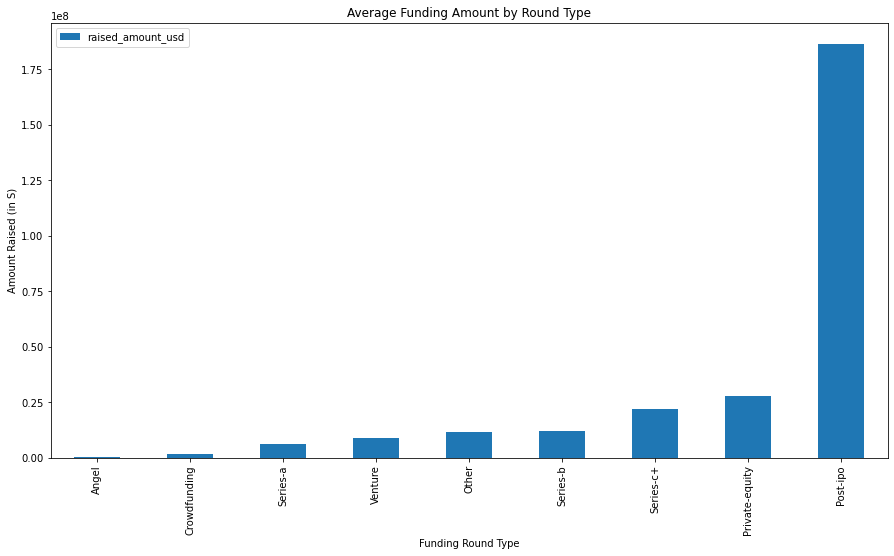

In [26]:
# Average Funding Amount by Round Type

q2_df.plot.bar()
plt.xlabel("Funding Round Type")
plt.ylabel("Amount Raised (in S)")
plt.title("Average Funding Amount by Round Type")
plt.savefig("Average Funding Amount by Round Type")

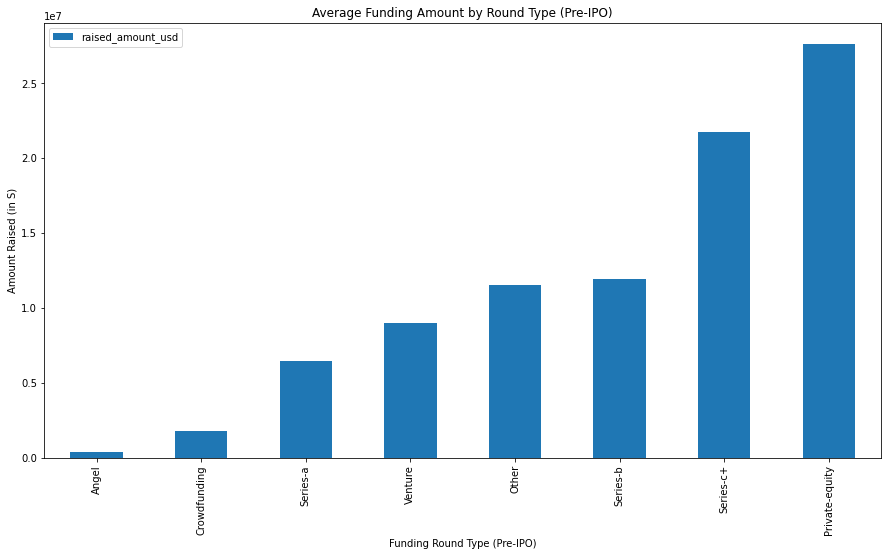

In [27]:
# Average Funding Amount by Round Type Pre-IPO

q2_df[q2_df.index != 'Post-ipo'].plot.bar()
plt.xlabel("Funding Round Type (Pre-IPO)")
plt.ylabel("Amount Raised (in S)")
plt.title("Average Funding Amount by Round Type (Pre-IPO)")
plt.savefig("Average Funding Amount by Round Type (Pre-IPO)")

## **Q3: What are the Top 10 Startup Market Categories? ​**

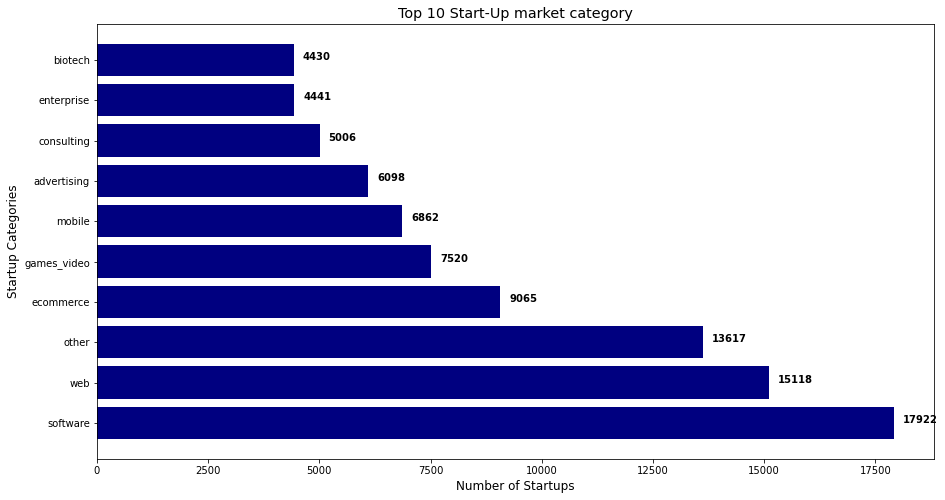

In [28]:
plt.rcParams['figure.figsize'] = 15,8
height = company['category_code'].value_counts()[:10].tolist()
bars =  company['category_code'].value_counts()[:10].index.tolist()
x_pos = np.arange(len(height))
error = np.random.rand(len(bars))
plt.barh(bars, height , xerr=error, color ="navy")
plt.title("Top 10 Start-Up market category", fontdict=None, size = 'x-large')
plt.xlabel("Number of Startups",size = 'large')
plt.ylabel("Startup Categories",size = 'large')
for index, value in enumerate(height):
  plt.text(value+200, index, str(value), weight="bold" )
plt.savefig("Hbar.png")
plt.show()

## Q4 : Who are the top 10 Investors in 21st Century  based on the funds invested?

In [29]:
fin = pd.read_csv("Startup Investment Dataset/updated_objects_finorg.csv")
print(fin.shape)
fin.head(2)

(11652, 14)


,id,entity_id,name,category_code,status,founded_at,overview,country_code,city,region,investment_rounds,invested_companies,funding_rounds,funding_total_usd
0,f:1,1,Greylock Partners,NaN,operating,1965-01-01,Greylock partners with entrepreneurs to help t...,USA,Menlo Park,SF Bay,307,196,0,0
1,f:10,10,Mission Ventures,NaN,operating,1996-01-01,Mission Ventures helps build successful enterp...,USA,San Diego,San Diego,58,33,0,0


In [30]:
# Convert String to Datetime column and filter 21st Century data

fin["founded_year"] = pd.to_datetime(fin.founded_at).dt.year
fin = fin[fin["founded_year"]>1999]
print(fin.shape)

(2698, 15)


In [31]:
# Drop duplicates

fin = fin[['id', 'name']].drop_duplicates()
print(fin.shape)
fin.head()

(2698, 2)


,id,name
7,f:10003,Merieux Developpement
9,f:10005,Texas Entrepreneur Networks
17,f:10015,IMI.VC
19,f:1002,Alven Capital
20,f:10020,East Valley Ventures


In [32]:
funds = pd.read_csv("Startup Investment Dataset/funds_v2.csv")
funds.head()

,object_id,name,amt_USD
0,f:371,Second Fund,300000000
1,f:17,Sequoia Israel Fourth Fund,200750000
2,f:951,Tenth fund,650000000
3,f:192,New funds acquire,625000000
4,f:519,Third fund,200000000


In [33]:
# Quick View of duplicate data

funds[funds['object_id'].duplicated(keep=False)].sort_values(by=['object_id']).head()

,object_id,name,amt_USD
324,f:1,Greylock Fund XIII,1000000000
1111,f:1,Greylock Fund XII,500000000
83,f:1,Greylock Fund XIV,1000000000
18,f:101,Fund 4,250000000
1291,f:101,Fund V,150000000


It is possible for a single investment firm to create multiple funds, hence we keep this data

In [34]:
invest_3 = pd.merge(funds[['object_id', 'name', 'amt_USD']], fin, left_on='object_id', right_on='id')
invest_3 = invest_3.drop(columns=['object_id', 'id']).drop_duplicates()
invest_3.columns=['Fund', 'Amount in USD', 'Investor']
print(invest_3.shape)
invest_3.head()

(560, 3)


,Fund,Amount in USD,Investor
0,Second Fund,300000000,DFJ DragonFund
1,Third fund,200000000,Steamboat Ventures
2,Inventus Capital Partners Fund I LP,51750000,Inventus Capital Partners
3,Inventus Capital Partners Fund II,100000000,Inventus Capital Partners
4,Roll Up Strategy,100000000,Bertram Capital Management


In [35]:
# Create final dataframe

top_10_inv = invest_3[['Investor', 'Amount in USD']].groupby(by='Investor').sum()
top_10_inv = top_10_inv.sort_values(by='Amount in USD', ascending=True)
top_10_inv = top_10_inv.tail(10)
top_10_inv

,Amount in USD
Investor,
Axiom Asia Private Capital,2100000000
Trilantic Capital Partners,2200000000
Andreessen Horowitz,2650000000
TowerBrook Capital Partners,2800000000
Mount Kellett Capital Management,4000000000
ZADIG Asset Management,4100000000
Vista Equity Partners,4500000000
GSO Capital Partners,5000000000
Brookfield Asset Management,12400000000


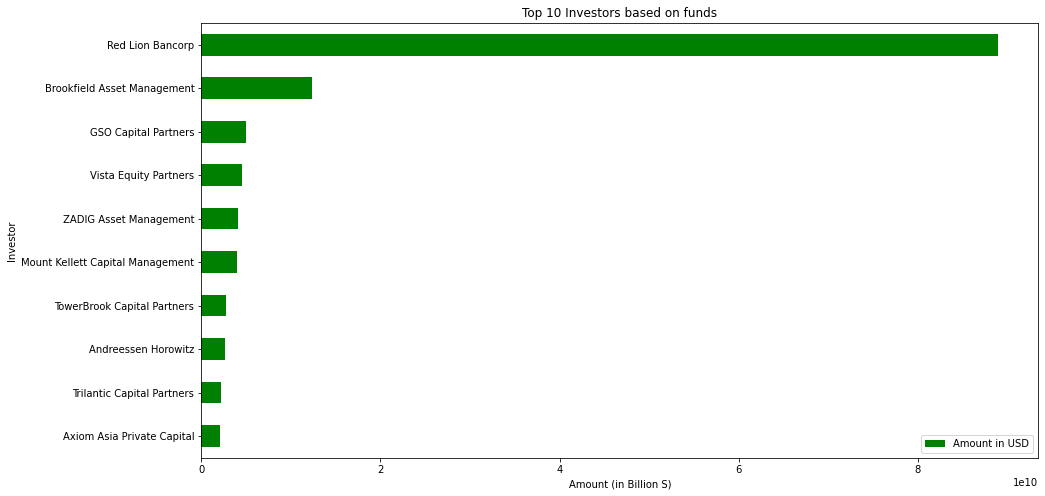

In [36]:
top_10_inv.plot.barh(color='green')
plt.xlabel("Amount (in Billion S)")
plt.title("Top 10 Investors based on funds")
plt.savefig("Top 10 Investors based on funds")

## **Q5: What are the Geolocations across the world where most of the startups are thriving?​**

In [37]:
office = pd.read_csv("Startup Investment Dataset/offices.csv")
print(office.shape)
office.head()

(112718, 15)


,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN


In [38]:
crs= {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip (office["longitude"] , office["latitude"])]
geo_df = gpd.GeoDataFrame(office , crs =crs,geometry= geometry)

/Users/mrunalighelani/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

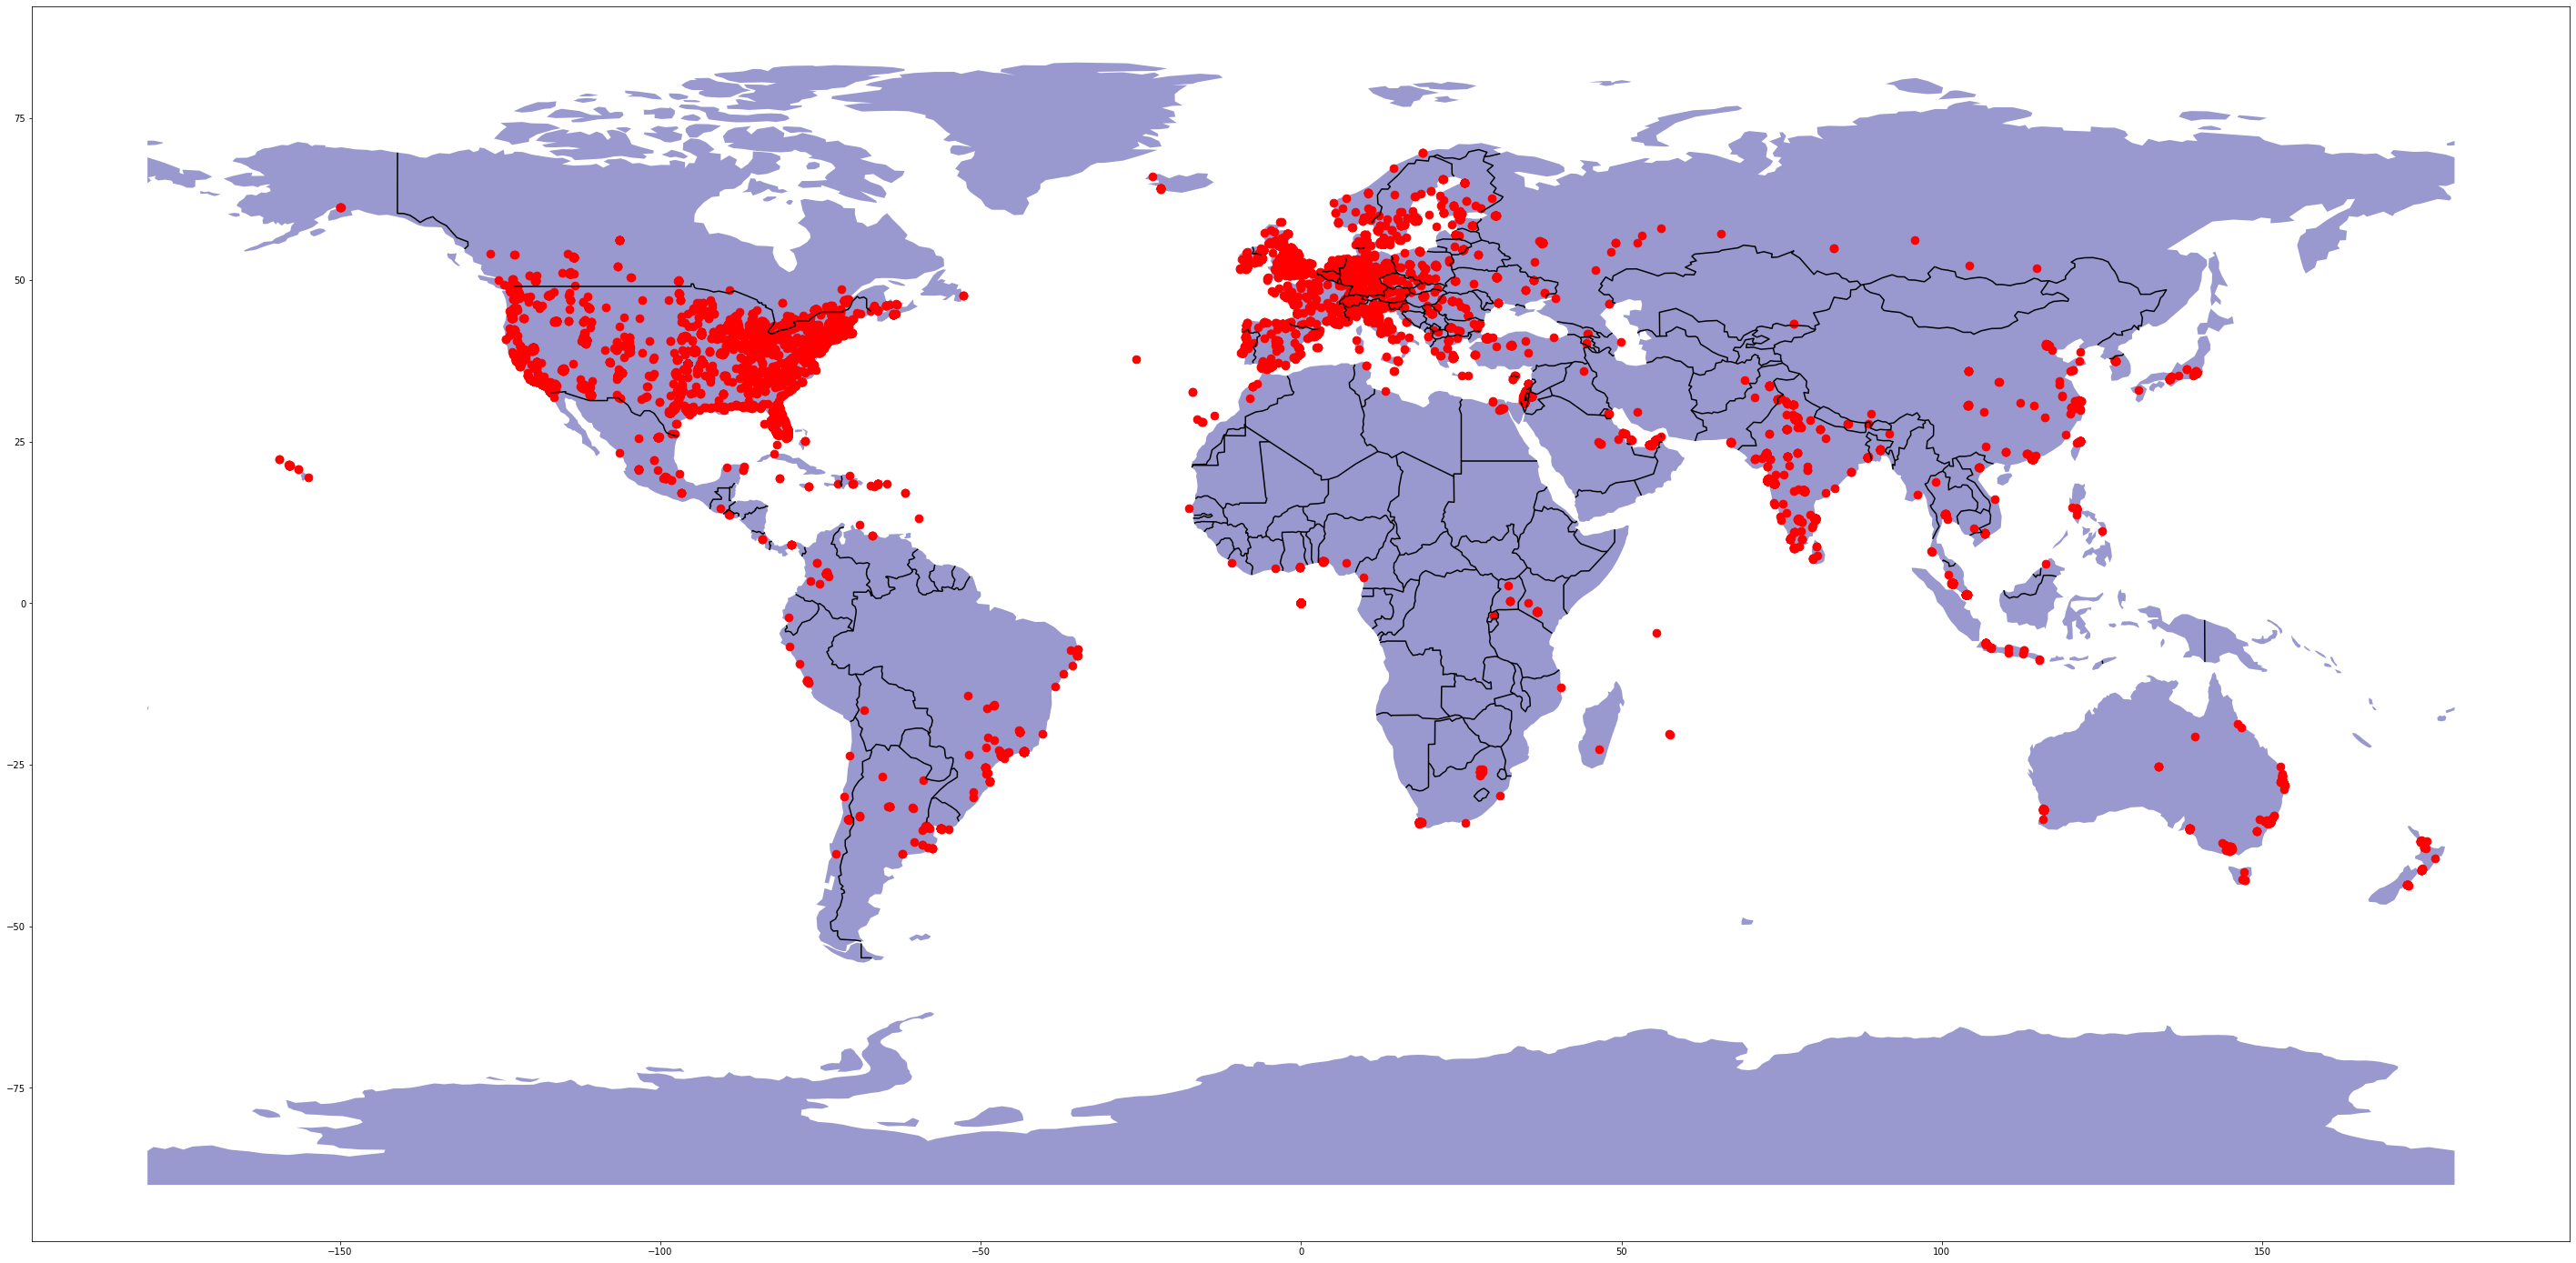

In [39]:
world = gpd.read_file("Startup Investment Dataset/110m_cultural/ne_110m_admin_0_countries.shp")
boundaries = gpd.read_file("Startup Investment Dataset/110m_cultural/ne_110m_admin_0_boundary_lines_land.shp")
fig, ax = plt.subplots(figsize=(50,50))
world.plot(ax=ax, alpha = 0.4 , color = "darkblue")
geo_df.plot(ax = ax ,markersize = 300, color = "Red",marker=".")
boundaries.plot(ax=ax , color = "black")